# Fundamentals

we dive into the “Hello World” of Machine Learning algorithms: Linear Regression.

We will cover the math, the optimization (Gradient Descent), and how to use Python’s industry-standard library, scikit-learn.

##  Introduction to Linear Regression
Goal: Find the relationship between an input variable (X) and an output variable (y).

In simple linear regression, we try to fit a straight line through our data.

The formula for a line is: $y = \omega x+ b$
- $y:$ The prediction(Target).
- $x:$ The input data(Feature).
- $\omega:$ The weight (Slope) _ How important is $x$
- $b:$ The Bias (Intercept)_ where does the line start?
## The Cost Function (MSE)
How do we know if our line is good? We measure the error.

Mean Squared Error (MSE): The average squared difference between the real answer and our prediction.

$MSE = \frac{1}{N}\Sigma(y_{actual} - y_{predicted})^ 2$ 
## Gradiant Descent
Problem: We have the formula, but how do we find the best $\omega $
 and $b$? We can’t just guess.

Solution: Gradient Descent.

Imagine you are on top of a mountain (High Error) and want to get to the bottom of the valley (Minimum Error). You take small steps in the steepest direction downwards.

1. Start with random $\Omega$ and $b$

2. Calculate the gradient (direction of steepness).

3. Update $\Omega$ and $b$slightly in the opposite direction.
4. Repeat until the error is minimized.

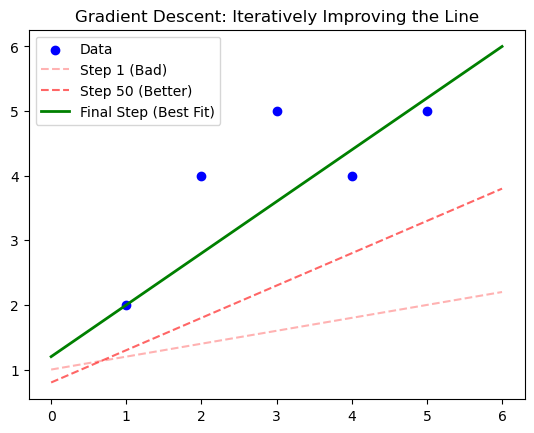

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Visualizing Gradient Descent Concept
def plot_gradient_descent_steps():
    X = np.array([1, 2, 3, 4, 5])
    y = np.array([2, 4, 5, 4, 5])

    plt.scatter(X, y, color='blue', label='Data')

    # Simulating steps of learning
    x_range = np.linspace(0, 6, 100)
    plt.plot(x_range, 0.2*x_range + 1, 'r--', alpha=0.3, label='Step 1 (Bad)')
    plt.plot(x_range, 0.5*x_range + 0.8, 'r--', alpha=0.6, label='Step 50 (Better)')
    plt.plot(x_range, 0.8*x_range + 1.2, 'g-', linewidth=2, label='Final Step (Best Fit)')
    
    plt.title("Gradient Descent: Iteratively Improving the Line")
    plt.legend()
    plt.show()

plot_gradient_descent_steps()

## Nonlinear Regression (Polynomial)
Not all data follows a straight line. Sometimes data is curved.

To solve this, we don’t change the algorithm; we change the data.
We add powers of features ($x^2, x^3, ...$)
Formula becomes:

$y = \omega_1x +  \omega_2x^2 + b $
This allows the linear model to fit curves.
## Bias & Variance (The Trade-off)
This is one of the most important concepts in ML.

1. High Bias (Underfitting):
- The model is too simple. It ignores the data patterns.
- Example: Fitting a straight line to a curve.
  
2. High Variance (Overfitting):
- The model is too complex. It memorizes the noise in the training data but fails on new data.
- Example: Connecting every single dot with a squiggly line.

Goal: Find the “Sweet Spot” (Low Bias, Low Variance).

## Regularization (L1 & L2)
How do we stop Overfitting (High Variance)? We use Regularization.

We punish the model if it tries to use large Weights ($\omega$).

1. Lasso Regression (L1): Adds the absolute value of weights to the cost. Can shrink weights to exactly zero (feature selection).
2. Ridge Regression (L2): Adds the squared value of weights to the cost. Shrinks weights to be small but not zero.
## Introduction to Sklearn (Programming)
Now, let’s stop doing math manually and use Scikit-Learn (sklearn), the most popular ML library in Python.

The 3-Step Workflow:

1. Import the model.
2. Instantiate (Create) the model.
3. Fit (Train) the model on data.

In [19]:
# 1. Import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Generate dummy date
# X = House size, y = Price
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1)

# Split data into Training and Testing sets (To check for Overfitting)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Instantieate the model
lin_reg = LinearRegression()

# 3. Fit the model(Training)
lin_reg.fit(X_train, y_train)

# Make prediction
y_pred = lin_reg.predict(X_test)

# Evaluate
print(f"Model Intercept (b): {lin_reg.intercept_}")
print(f"Model Coefficient (w): {lin_reg.coef_}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2 Score (Accuracy): {r2_score(y_test, y_pred):.2f}")

Model Intercept (b): [4.14291332]
Model Coefficient (w): [[2.79932366]]
Mean Squared Error: 0.65
R2 Score (Accuracy): 0.81
